# Problem 1: Clustering
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [14]:
Bank_Market = pd.read_csv(r'C:\Users\vicky\Document\bank_marketing_part1_Data.csv')

In [15]:
Bank_Market.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [16]:
Bank_Market.tail(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
203,11.55,13.10,0.8455,5.167,2.845,6.715,4.956
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [17]:
Bank_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [18]:
# All the variables numeric type.
# 7 variables and 210 records.
# No missing record based on intial analysis.

In [19]:
Bank_Market.shape

(210, 7)

In [20]:
Bank_Market.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [21]:
# There is no missing value.

# Univariate analysis

In [22]:
Bank_Market.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Observation:
- Based on summary descriptive, the data looks good.
- We see for most of the variable, mean/medium are nearly equal.
- Std Deviation is high for spending variable
- Std Deviation is very low for probability_of_full_payment

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

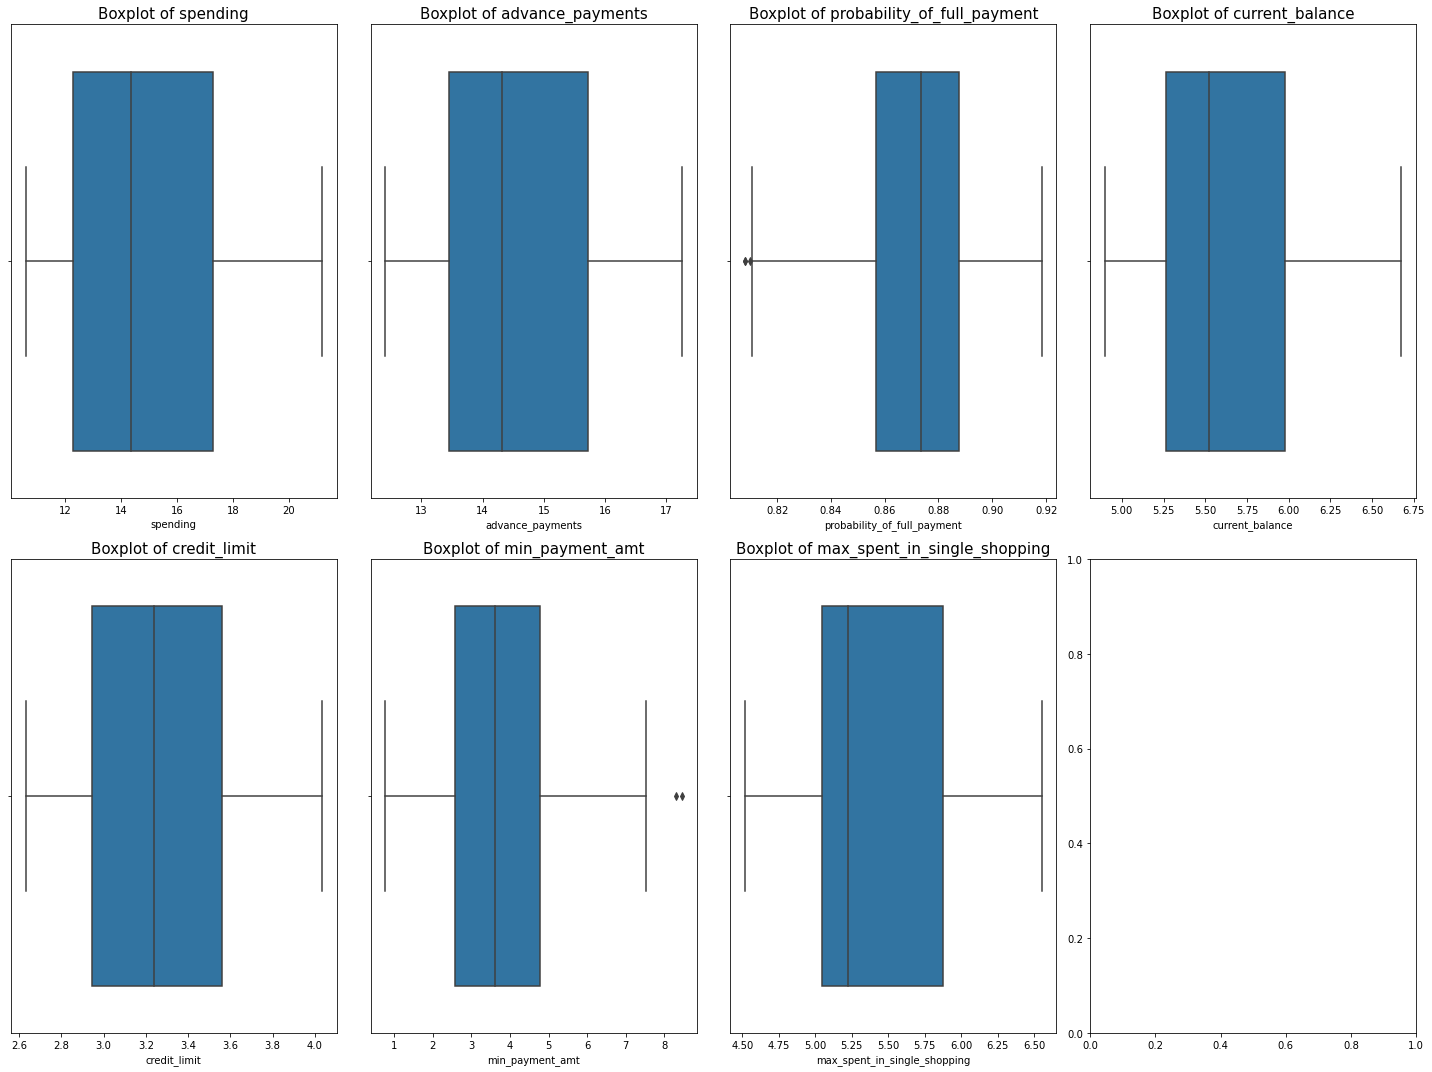

In [317]:
# Boxplot for checking presence of outliers in each feature or Univariate Analysis of all variables
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(20,15)
a = sns.boxplot(Bank_Market['spending'] , orient = "v" , ax=axes[0][0])
a.set_title("Boxplot of spending",fontsize=15)
a = sns.boxplot(Bank_Market['advance_payments'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot of advance_payments",fontsize=15)
a = sns.boxplot(Bank_Market['probability_of_full_payment'] , orient = "v" , ax=axes[0][2])
a.set_title("Boxplot of probability_of_full_payment",fontsize=15)
a = sns.boxplot(Bank_Market['current_balance'] , orient = "v" , ax=axes[0][3])
a.set_title("Boxplot of current_balance",fontsize=15)
a = sns.boxplot(Bank_Market['credit_limit'] , orient = "v" , ax=axes[1][0])
a.set_title("Boxplot of credit_limit",fontsize=15)
a = sns.boxplot(Bank_Market['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot of min_payment_amt",fontsize=15)
a = sns.boxplot(Bank_Market['max_spent_in_single_shopping'] , orient = "v" , ax=axes[1][2])
a.set_title("Boxplot of max_spent_in_single_shopping",fontsize=15)
plt.tight_layout()
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

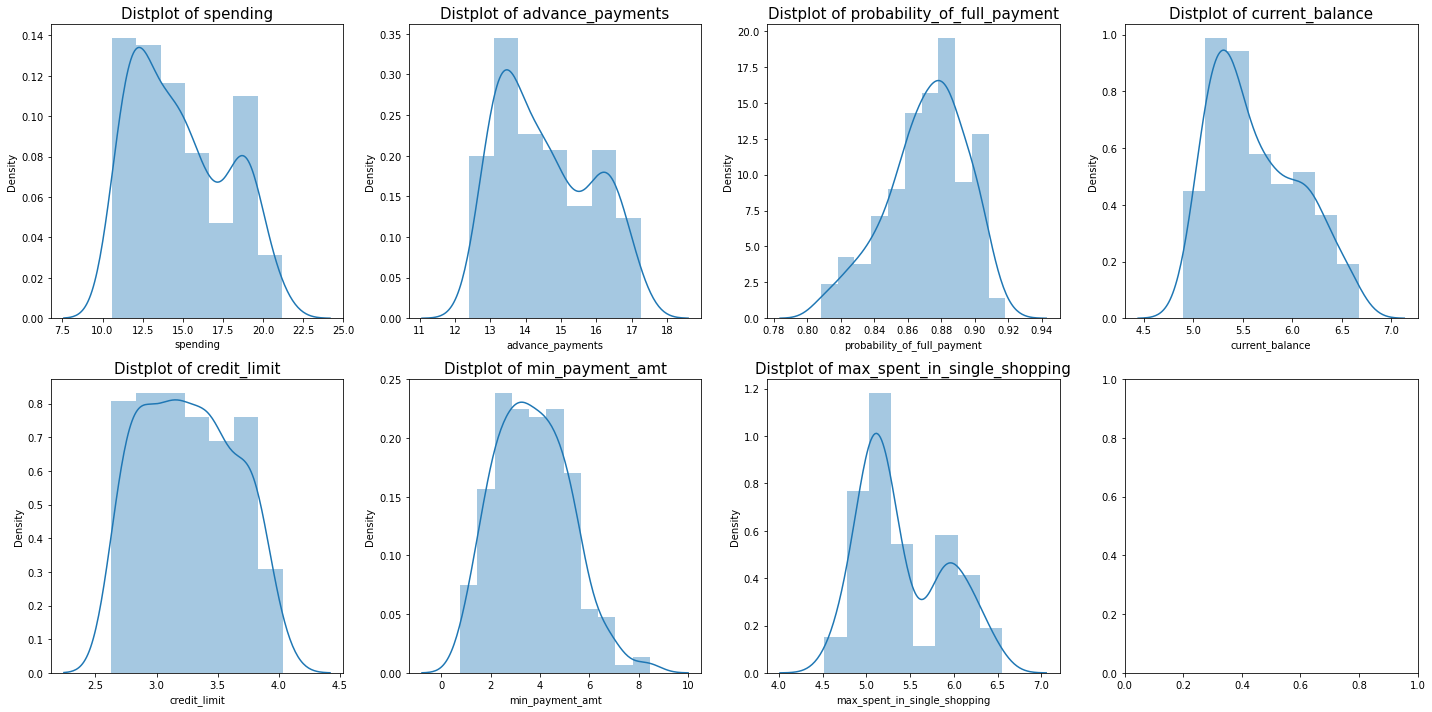

In [318]:
# Distplot to check Distribution and Density of each Variables
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(20, 10)
a = sns.distplot(Bank_Market['spending'] , ax=axes[0][0])
a.set_title("Distplot of spending",fontsize=15)
a = sns.distplot(Bank_Market['advance_payments'] , ax=axes[0][1])
a.set_title("Distplot of advance_payments",fontsize=15)
a = sns.distplot(Bank_Market['probability_of_full_payment'] , ax=axes[0][2])
a.set_title("Distplot of probability_of_full_payment",fontsize=15)
a = sns.distplot(Bank_Market['current_balance'] , ax=axes[0][3])
a.set_title("Distplot of current_balance",fontsize=15)
a = sns.distplot(Bank_Market['credit_limit'] , ax=axes[1][0])
a.set_title("Distplot of credit_limit",fontsize=15)
a = sns.distplot(Bank_Market['min_payment_amt'] , ax=axes[1][1])
a.set_title("Distplot of min_payment_amt",fontsize=15)
a = sns.distplot(Bank_Market['max_spent_in_single_shopping'] , ax=axes[1][2])
a.set_title("Distplot of max_spent_in_single_shopping",fontsize=15)
plt.tight_layout()
plt.show()

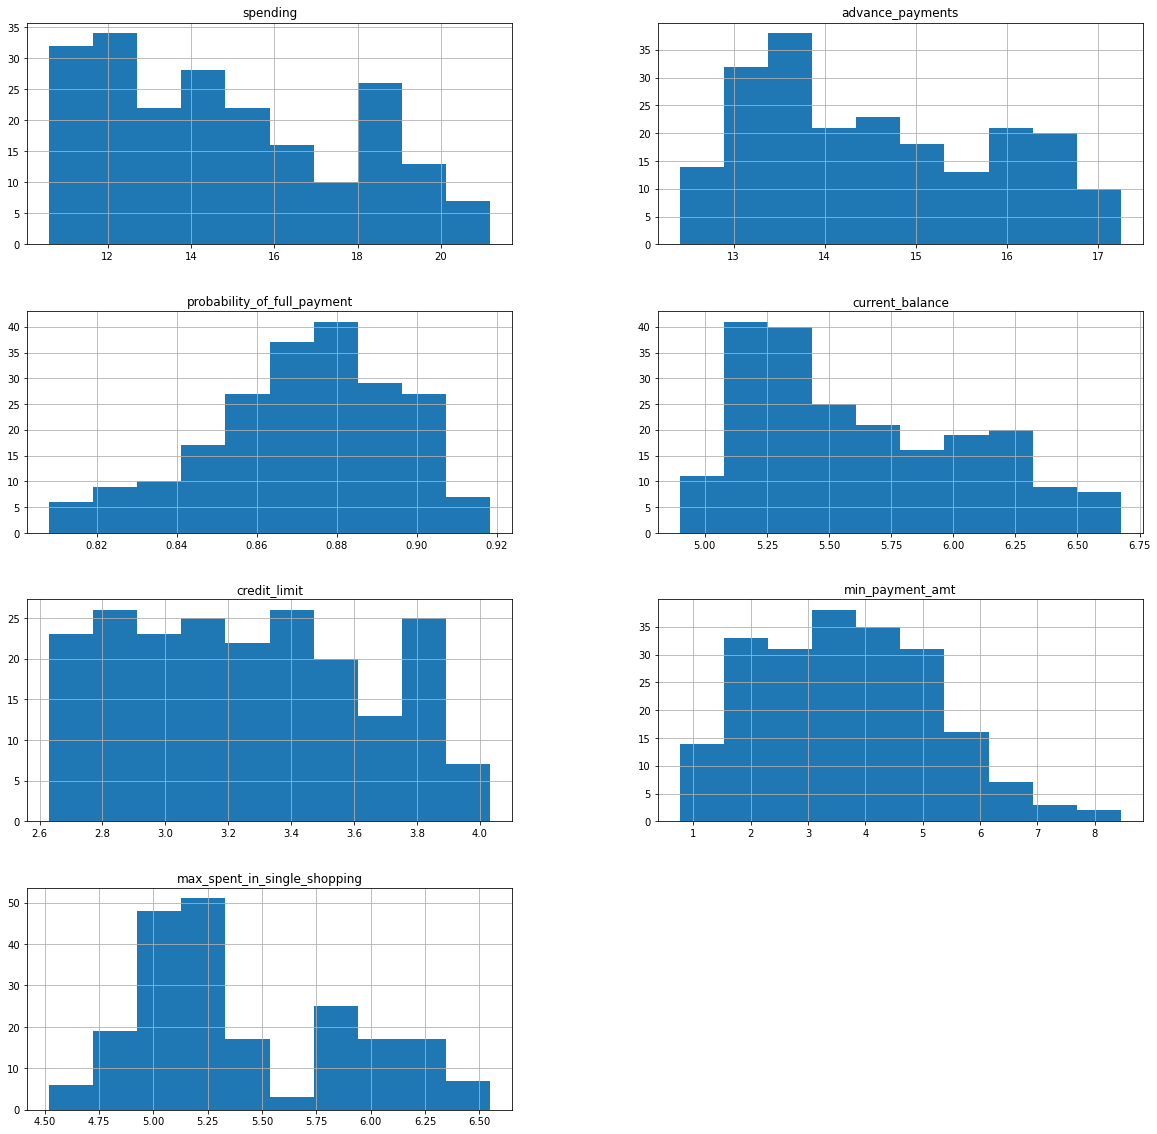

In [319]:
# Let's us only plot the distributions of independent attributes
Bank_Market.hist(figsize=(20,20),layout=(4,2));

In [320]:
# Let's check the skewness values quantitatively
Bank_Market.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

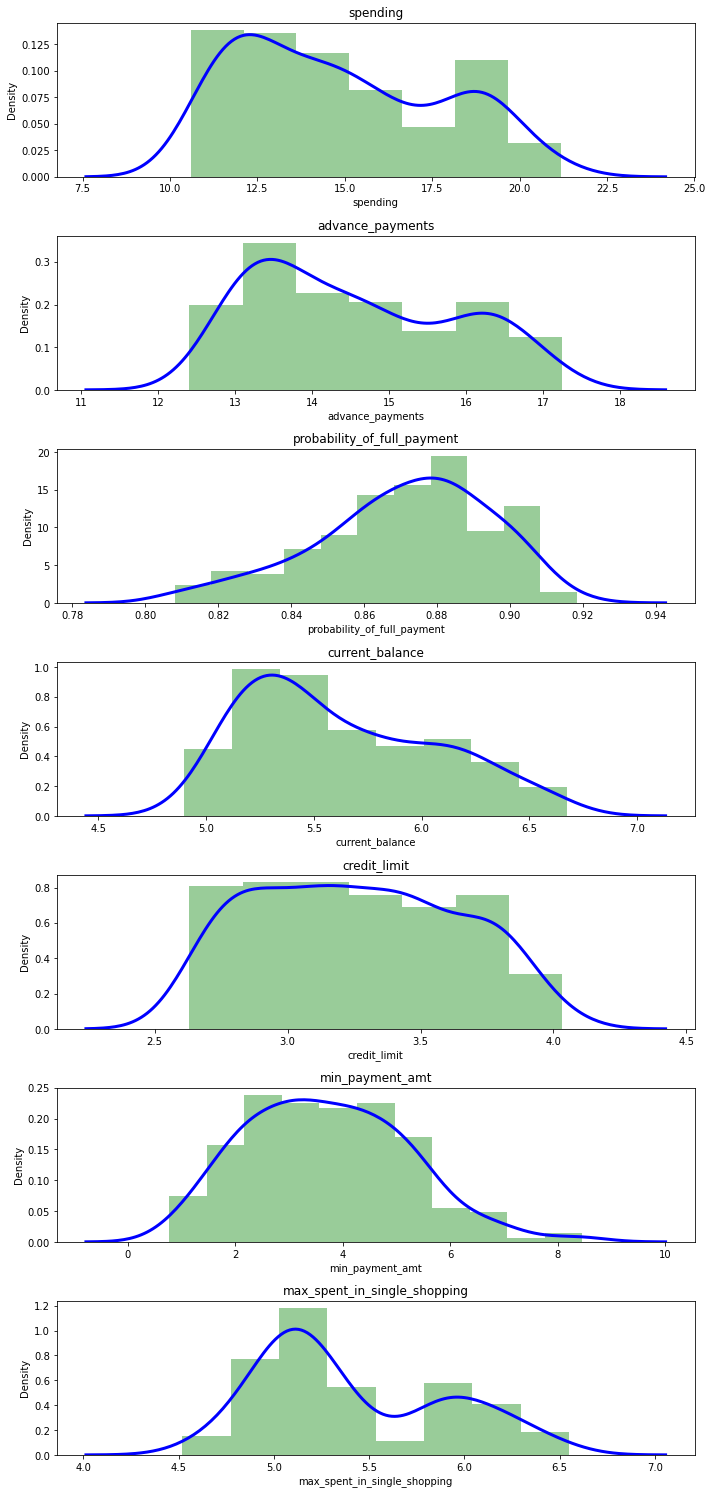

In [321]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

plt.figure(figsize=(10,50))
for i in range(len(Bank_Market.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(Bank_Market[Bank_Market.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(Bank_Market.columns[i])

plt.tight_layout()

Observations

- Credit limit average is around $3.258(10000s)

- Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

# Multivariate analysis

Check for multicollinearity

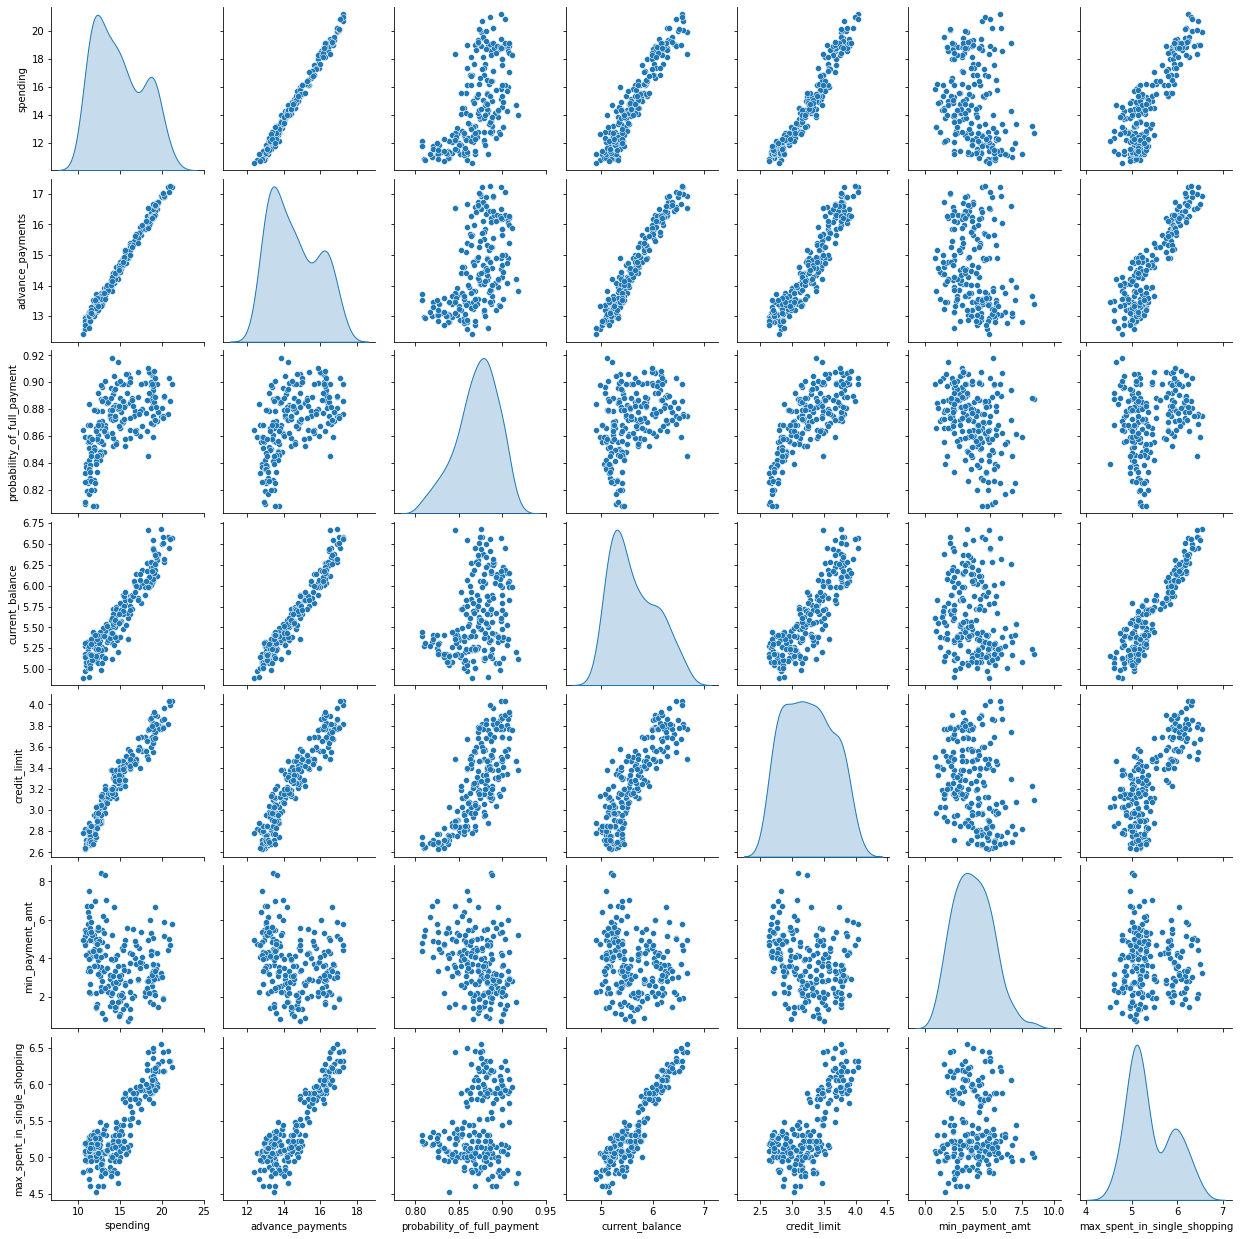

In [322]:
sns.pairplot(Bank_Market,diag_kind='kde');

Observation
- Strong positive correlation between 
        - spending & advance_payments, 
        - advance_payments & current_balance, 
        - credit_limit & spending
        - spending & current_balance
        - credit_limit & advance_payments
        - max_spent_in_single_shopping  current_balance

In [323]:
# Checking correlation matrix

Bank_Market.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


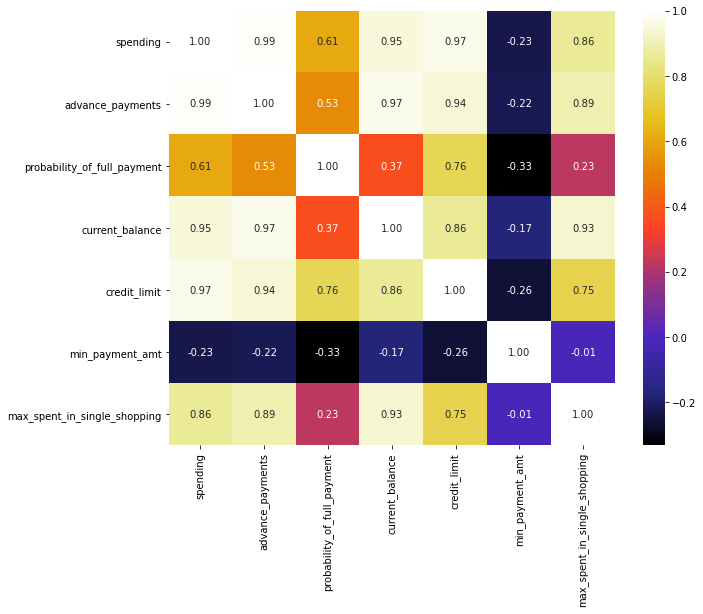

In [324]:
# creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(Bank_Market.corr(),annot=True,fmt=".2f",cmap="CMRmap")
plt.show()

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [23]:
# Scaling needs to be done as the values of the variables are different.
# Spending, advance_payments are in different values and this may get more weightage.
# Also have shown below the plot of the data prior and after scaling.
# Scaling will have all the values in the relative same range.
# I have used zscore to standarised the data to relative same scale -3 to +3.

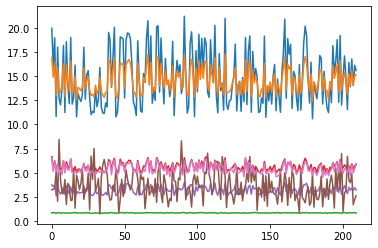

In [24]:
# Before to scaling 
plt.plot(Bank_Market)
plt.show()

In [25]:
# Using Zscore for scaling/standardisation.

from scipy.stats import zscore
data_Scaled=Bank_Market.apply(zscore)
data_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


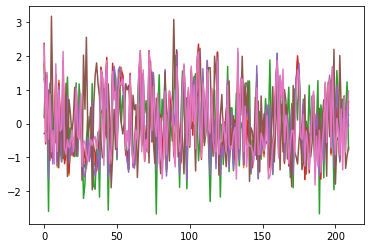

In [26]:
# After to scaling
plt.plot(data_Scaled)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [27]:
# Creating the Dendrogram

# Importing dendrogram and linkage module

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
# Choosing average linkage method

link_method = linkage(data_Scaled, method = 'average')

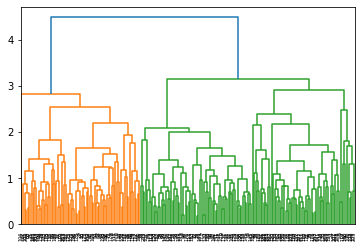

In [30]:
dend = dendrogram(link_method)

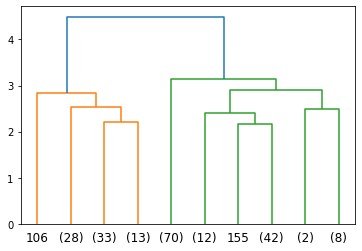

In [31]:
# Cutting the Dendrogram with suitable clusters

dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

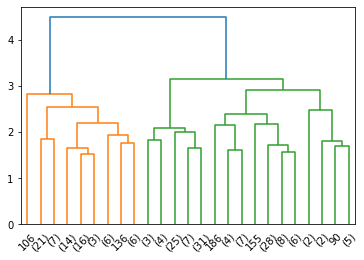

In [32]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [33]:
# Importing fcluster module to create clusters

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [36]:
clusters_dataset=Bank_Market.copy()

In [37]:
clusters_dataset['clusters-3'] = clusters

In [38]:
clusters_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [39]:
# Cluster Frequency

In [40]:
clusters_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [41]:
# Cluster Profiles

In [42]:
aggdata=clusters_dataset.groupby('clusters-3').mean()
aggdata['Freq']=clusters_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [43]:
# Another method - ward

In [44]:
wardlink = linkage(data_Scaled, method = 'ward')

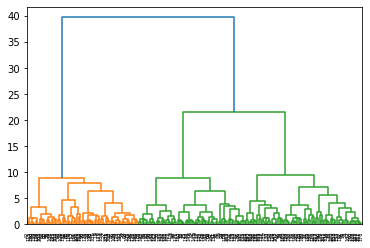

In [45]:
dend_wardlink = dendrogram(wardlink)

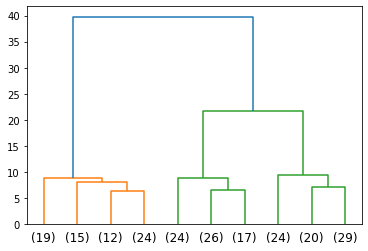

In [46]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [47]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [48]:
clusters_dataset=Bank_Market.copy()

In [49]:
clusters_dataset['clusters-3'] = clusters_wdlk_3

In [50]:
clusters_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [51]:
clusters_dataset['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

In [52]:
aggdata=clusters_dataset.groupby('clusters-3').mean()
aggdata['Freq']=clusters_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [53]:
# Observation
# Both the method are almost similar means, minor variation, which we know it occurs.
# We for cluster grouping based on the dendrogram, 3 or 4 looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering
# Also in real time, there could have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.
# And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [54]:
from sklearn.cluster import KMeans 

In [55]:
k_means = KMeans(n_clusters = 1)
k_means.fit(data_Scaled)
k_means.inertia_

1469.9999999999995

In [56]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_Scaled)
k_means.inertia_

659.1717544870411

In [57]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_Scaled)
k_means.inertia_

430.65897315130064

In [58]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_Scaled)
k_means.inertia_

371.63850909958313

In [59]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_Scaled)
k_means.inertia_

326.35341185071155

In [60]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data_Scaled)
k_means.inertia_

289.37929196256925

In [61]:
wss =[] 

In [62]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(data_Scaled)
        wss.append(KM.inertia_)

In [63]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.5811909715524,
 327.9966912581544,
 289.235421599318,
 265.2220500793183,
 242.3439725929074,
 222.41727056945803,
 205.00191949800978]

In [64]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

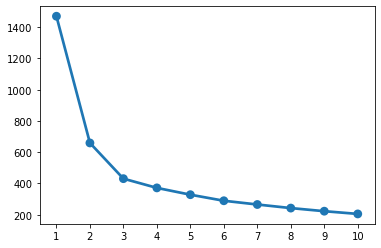

In [65]:
sns.pointplot(a, wss)

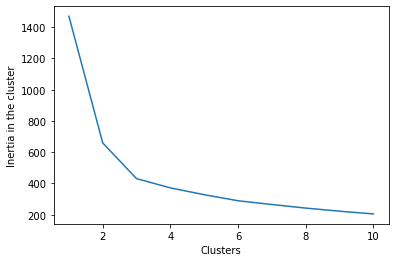

In [66]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [67]:
# KMeans with K=3
k_means = KMeans(n_clusters = 3)
k_means.fit(data_Scaled)
labels = k_means.labels_

In [68]:
kmeans_data=Bank_Market.copy()

In [69]:
# Appending Clusters to the original dataset
kmeans_data["Clus_kmeans"] = labels
kmeans_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [71]:
silhouette_score(data_Scaled,labels)

0.40072705527512986

In [72]:
from sklearn import metrics

In [73]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(data_Scaled)
    scores.append(metrics.silhouette_score(data_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272519,
 0.2694844355168536,
 0.2543731602750563,
 0.2623959398663564,
 0.2673980772529918]

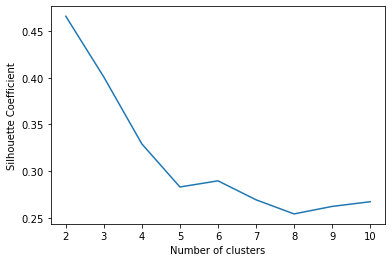

In [74]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [75]:
#Insights

#From SC Score, the number of optimal clusters could be 3 or 4

In [76]:
sil_width = silhouette_samples(data_Scaled,labels)

In [77]:
kmeans_data["sil_width"] = sil_width
kmeans_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [78]:
silhouette_samples(data_Scaled,labels).min()

0.002713089347678376

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [85]:
# Cluster Group Profiles
# Group 1 : High Spending
# Group 3 : Medium Spending
# Group 2 : Low Spending

In [86]:
# Promotional strategies for each cluster

# Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

# Group 2 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

# Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more